In [11]:
# Brain network analysisis in healthy and schrizo pateints

import os
import pandas as pd
import nibabel as nib
from nilearn import datasets, image,input_data
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import networkx as nx
from scipy.stats import mannwhitneyu

In [12]:
# Define data path
data_path = "C:\\Users\\vishw\\OneDrive\\Desktop\\Network analysis\\Data"

In [13]:
# load the phenotypic data

phenopt = os.path.join(data_path, "phenotypic_data.tsv.gz")
phenodf = pd.read_csv(phenopt, sep="\t")

# displaying first few rows

print(phenodf.head())

#listing all fmri files
fmri_f = [f for f in os.listdir(data_path) if f.endswith(".nii.gz")]
print("\nTotal fmri scans:",len(fmri_f))

      ID  Current Age  Gender Handedness Subject Type              Diagnosis  \
0  40061           18    Male      Right      Control                    NaN   
1  40090           18  Female      Right      Control                    NaN   
2  40046           18    Male       Left      Patient  295.70 depressed type   
3  40002           19    Male      Right      Patient                  295.3   
4  40117           19    Male      Right      Patient                  295.3   

   Frames OK       FD  FD Scrubbed  
0        133  0.25512      0.22657  
1        150  0.16963      0.16963  
2         76  0.37504      0.30042  
3         67  0.40006      0.21575  
4        133  0.20975      0.18410  

Total fmri scans: 146


In [14]:
# loading the nilearnbrain atals 
atlas = datasets.fetch_atlas_harvard_oxford("cort-maxprob-thr25-2mm") 
atlas_filename = atlas.maps

# Initialize masker to extract region-wise time series
masker = input_data.NiftiLabelsMasker(atlas_filename,standardize=True)

# Dictionary to store extracted time series
time_series_data = {}

# Loop over all fmri files
for fmri_f in fmri_f:
    print(f"currently doing: {fmri_f}")
    #extarct subjects
    subject_id = fmri_f.replace("fmri_","").replace(".nii.gz","")
    #load fmri data
    fmri_img = image.load_img(os.path.join(data_path,fmri_f))
    #extract time series
    time_series = masker.fit_transform(fmri_img)
    time_series_data[subject_id] = time_series

    #save the time series data
    time_series_data[subject_id] = time_series

    print(f"Subject {subject_id}: Extracted time series shape: {time_series.shape}")





[get_dataset_dir] Dataset found in C:\Users\vishw\nilearn_data\fsl

currently doing: fmri_0040000.nii.gz
Subject 0040000: Extracted time series shape: (150, 48)
currently doing: fmri_0040001.nii.gz
Subject 0040001: Extracted time series shape: (150, 48)
currently doing: fmri_0040002.nii.gz
Subject 0040002: Extracted time series shape: (150, 48)
currently doing: fmri_0040003.nii.gz
Subject 0040003: Extracted time series shape: (150, 48)
currently doing: fmri_0040004.nii.gz
Subject 0040004: Extracted time series shape: (150, 48)
currently doing: fmri_0040005.nii.gz
Subject 0040005: Extracted time series shape: (150, 48)
currently doing: fmri_0040006.nii.gz
Subject 0040006: Extracted time series shape: (150, 48)
currently doing: fmri_0040007.nii.gz
Subject 0040007: Extracted time series shape: (150, 48)
currently doing: fmri_0040008.nii.gz
Subject 0040008: Extracted time series shape: (150, 48)
currently doing: fmri_0040009.nii.gz
Subject 0040009: Extracted time series shape: (150, 48)
currently doing: fmri_0040010.nii.gz
Subject 0040010: Extracted time s

In [15]:
# Dictionary to store correlation matrices
correlation_matrx = {}

# Compute correlation matrices
for subject, time_series in time_series_data.items():
    correlation_matr = np.corrcoef(time_series.T)  # Compute Pearson correlation
    correlation_matrx[subject] = correlation_matr  # Store the matrix
    print(f"Subject {subject}: Correlation matrix shape: {correlation_matr.shape}")

Subject 0040000: Correlation matrix shape: (48, 48)
Subject 0040001: Correlation matrix shape: (48, 48)
Subject 0040002: Correlation matrix shape: (48, 48)
Subject 0040003: Correlation matrix shape: (48, 48)
Subject 0040004: Correlation matrix shape: (48, 48)
Subject 0040005: Correlation matrix shape: (48, 48)
Subject 0040006: Correlation matrix shape: (48, 48)
Subject 0040007: Correlation matrix shape: (48, 48)
Subject 0040008: Correlation matrix shape: (48, 48)
Subject 0040009: Correlation matrix shape: (48, 48)
Subject 0040010: Correlation matrix shape: (48, 48)
Subject 0040011: Correlation matrix shape: (48, 48)
Subject 0040012: Correlation matrix shape: (48, 48)
Subject 0040013: Correlation matrix shape: (48, 48)
Subject 0040014: Correlation matrix shape: (48, 48)
Subject 0040015: Correlation matrix shape: (48, 48)
Subject 0040016: Correlation matrix shape: (48, 48)
Subject 0040017: Correlation matrix shape: (48, 48)
Subject 0040018: Correlation matrix shape: (48, 48)
Subject 0040

In [16]:
# Lists to store matrices of control and patient groups
patients = []
controls = []

# Classify subjects into patients and controls
for subject_id, correlation_matr in correlation_matrx.items():
    # Find the corresponding row in phenotypic data
    subject_row = phenodf[phenodf["ID"] == int(subject_id)]
    
    if not subject_row.empty:
        subject_type = subject_row["Subject Type"].values[0]
        if subject_type == "Patient":
            patients.append(correlation_matr)
        elif subject_type == "Control":
            controls.append(correlation_matr)

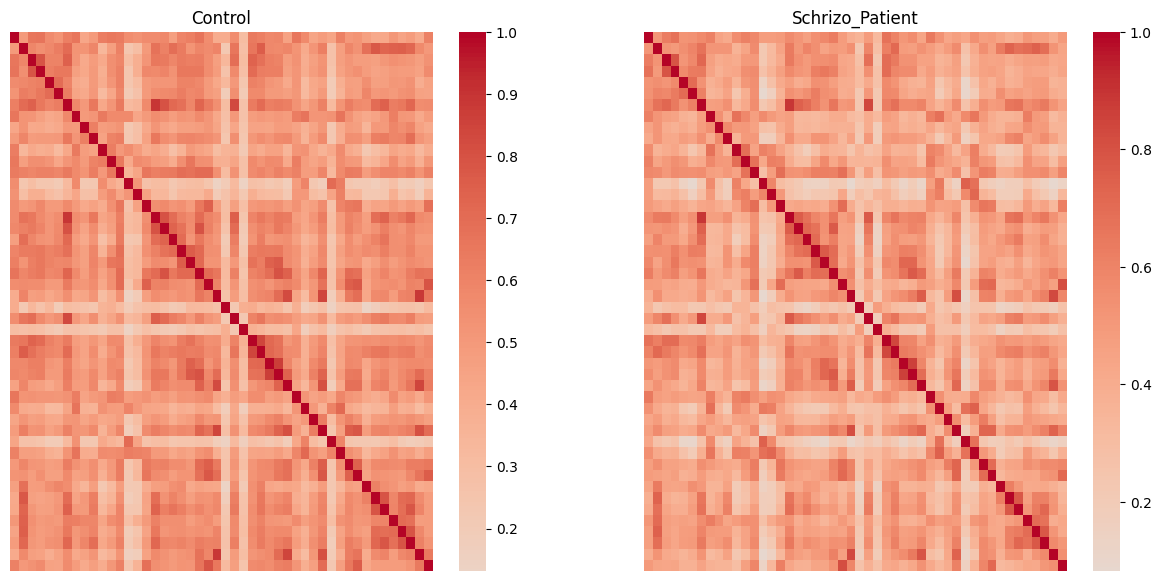

In [18]:
# compute mean correlation matrix for patients

mean_control = np.mean(controls, axis=0)
mean_pat = np.mean(patients, axis=0) 

#PLOT
fig, axes = plt.subplots(1,2, figsize=(15,7))

sns.heatmap(mean_control, ax=axes[0], cmap="coolwarm", center=0, xticklabels=False, yticklabels=False)
axes[0].set_title("Control")

sns.heatmap(mean_pat, ax=axes[1], cmap="coolwarm", center=0, xticklabels=False, yticklabels=False)
axes[1].set_title("Schrizo_Patient")

plt.show()


[get_dataset_dir] Dataset found in C:\Users\vishw\nilearn_data\fsl

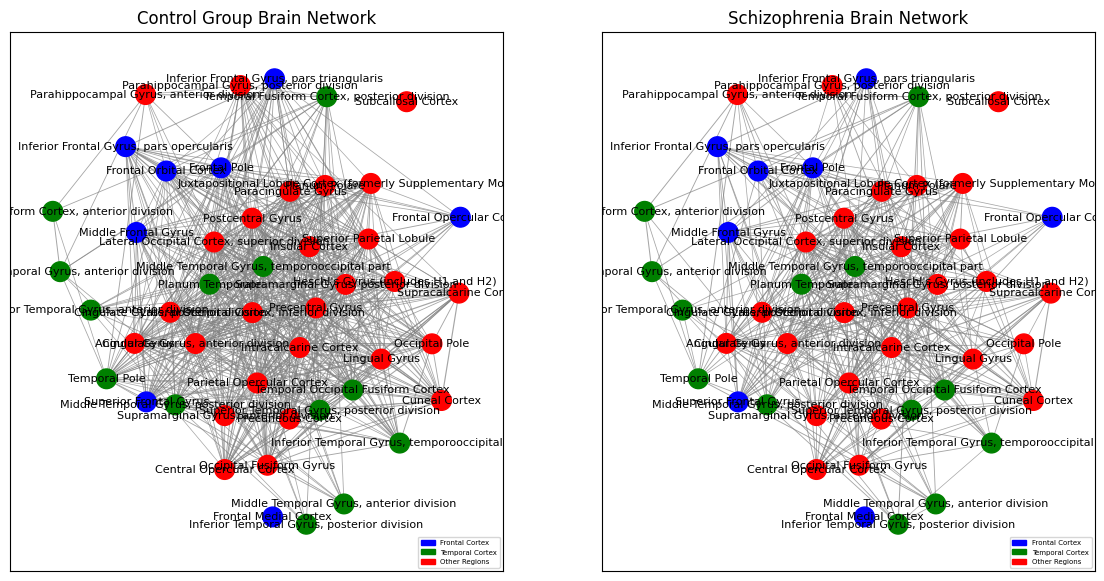

In [27]:
# Load the Harvard-Oxford Cortical Atlas (for labeling)
ho_atlas = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-1mm')
region_labels = ho_atlas.labels  # Get brain region names

# Remove 'Unknown' label (first entry)
region_labels = region_labels[1:]  # Skip the first entry ('Unknown')

# Define brain region categories based on Harvard-Oxford Atlas
frontal_lobe_nodes = {i for i, name in enumerate(region_labels) if "Frontal" in name}
temporal_lobe_nodes = {i for i, name in enumerate(region_labels) if "Temporal" in name}

# Set correlation threshold for edge inclusion
threshold = 0.5

def graph(matrix, threshold):
    """Convert correlation matrix to a network graph."""
    G = nx.Graph()
    num_regions = matrix.shape[0]

    # Add nodes (Brain regions)
    for i in range(num_regions):
        G.add_node(i, label=region_labels[i])  # Assign real brain region names

    # Add edges based on correlation threshold
    for i in range(num_regions):
        for j in range(i + 1, num_regions):  # Upper triangle only
            weight = matrix[i, j]
            if abs(weight) > threshold:
                G.add_edge(i, j, weight=weight)

    return G    

# Create graphs using actual fMRI correlation matrices
G_control = graph(mean_control, threshold)
G_patient = graph(mean_pat, threshold)

# Generate a fixed layout (same for both graphs)
fixed_pos = nx.spring_layout(G_control, seed=42, k=2.0)  # Fixed node positions

def plot_graph(G, ax, title):
    """Plot brain connectivity graph with fixed layout and region-specific colors."""
    edges = G.edges(data=True)

    # Assign node colors based on brain regions
    node_colors = []
    for node in G.nodes():
        if node in frontal_lobe_nodes:
            node_colors.append("blue")  # Frontal Cortex
        elif node in temporal_lobe_nodes:
            node_colors.append("green")  # Temporal Cortex
        else:
            node_colors.append("red")  # Other regions

    # Draw nodes
    nx.draw_networkx_nodes(G, fixed_pos, ax=ax, node_size=200, node_color=node_colors)

    # Draw edges with thickness based on correlation strength
    edge_weights = [abs(data['weight']) for _, _, data in edges]
    nx.draw_networkx_edges(G, fixed_pos, ax=ax, edgelist=edges, width=edge_weights, edge_color="gray", alpha=0.7)

    # Draw brain region labels
    node_labels = {i: G.nodes[i]['label'] for i in G.nodes()}
    nx.draw_networkx_labels(G, fixed_pos, labels=node_labels, ax=ax, font_size=8, font_color="black")

    # Titles
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])

    # Add legend
    blue_patch = mpatches.Patch(color="blue", label="Frontal Cortex")
    green_patch = mpatches.Patch(color="green", label="Temporal Cortex")
    red_patch = mpatches.Patch(color="red", label="Other Regions")

    ax.legend(handles=[blue_patch, green_patch, red_patch], loc="lower right", fontsize=5)


# Plot both graphs
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
plot_graph(G_control, axes[0], "Control Group Brain Network")
plot_graph(G_patient, axes[1], "Schizophrenia Brain Network")

plt.show()

In [29]:
# Function to compute network metrics
def compute_graph_metrics(G):
    metrics = {}
    metrics["Density"] = nx.density(G)
    metrics["Average Degree"] = np.mean([deg for _, deg in G.degree()])
    metrics["Clustering Coefficient"] = nx.average_clustering(G)
    
    # Handle disconnected graphs
    metrics["Characteristic Path Length"] = (
        nx.average_shortest_path_length(G) if nx.is_connected(G) else None
    )
    
    # Betweenness Centrality (normalized)
    betweenness = nx.betweenness_centrality(G)
    metrics["Average Betweenness"] = np.mean(list(betweenness.values()))
    
    return metrics

# Compute metrics for both graphs
control_metrics = compute_graph_metrics(G_control)
patient_metrics = compute_graph_metrics(G_patient)

# Print comparison
print("Network Comparison:")
for key in control_metrics:
    control_value = control_metrics[key]
    patient_value = patient_metrics[key]
    
    # Handle None values (e.g., if the graph is disconnected)
    if control_value is None or patient_value is None:
        print(f"{key}: Control = {control_value}, Schizophrenia = {patient_value}")
    else:
        print(f"{key}: Control = {control_value:.4f}, Schizophrenia = {patient_value:.4f}")

Network Comparison:
Density: Control = 0.5550, Schizophrenia = 0.3475
Average Degree: Control = 26.0833, Schizophrenia = 16.3333
Clustering Coefficient: Control = 0.7796, Schizophrenia = 0.6551
Characteristic Path Length: Control = None, Schizophrenia = None
Average Betweenness: Control = 0.0086, Schizophrenia = 0.0150


In [30]:

# Function to compute hub metrics
def compute_hub_metrics(G):
    metrics = {}
    metrics["Degree Centrality"] = nx.degree_centrality(G)
    metrics["Betweenness Centrality"] = nx.betweenness_centrality(G)
    metrics["Eigenvector Centrality"] = nx.eigenvector_centrality(G, max_iter=1000)

    return metrics

# Compute centrality measures for both networks
control_hubs = compute_hub_metrics(G_control)
patient_hubs = compute_hub_metrics(G_patient)

# Convert results to sorted lists (descending order)
control_sorted_degree = sorted(control_hubs["Degree Centrality"].items(), key=lambda x: x[1], reverse=True)
patient_sorted_degree = sorted(patient_hubs["Degree Centrality"].items(), key=lambda x: x[1], reverse=True)

control_sorted_betweenness = sorted(control_hubs["Betweenness Centrality"].items(), key=lambda x: x[1], reverse=True)
patient_sorted_betweenness = sorted(patient_hubs["Betweenness Centrality"].items(), key=lambda x: x[1], reverse=True)

control_sorted_eigenvector = sorted(control_hubs["Eigenvector Centrality"].items(), key=lambda x: x[1], reverse=True)
patient_sorted_eigenvector = sorted(patient_hubs["Eigenvector Centrality"].items(), key=lambda x: x[1], reverse=True)

# Display the top 10 hubs for each metric
print("\nTop 10 Degree Centrality Hubs:")
for i in range(10):
    print(f"Control: {control_sorted_degree[i][0]} ({control_sorted_degree[i][1]:.4f}), "
          f"Schizophrenia: {patient_sorted_degree[i][0]} ({patient_sorted_degree[i][1]:.4f})")

print("\nTop 10 Betweenness Centrality Hubs:")
for i in range(10):
    print(f"Control: {control_sorted_betweenness[i][0]} ({control_sorted_betweenness[i][1]:.4f}), "
          f"Schizophrenia: {patient_sorted_betweenness[i][0]} ({patient_sorted_betweenness[i][1]:.4f})")

print("\nTop 10 Eigenvector Centrality Hubs:")
for i in range(10):
    print(f"Control: {control_sorted_eigenvector[i][0]} ({control_sorted_eigenvector[i][1]:.4f}), "
          f"Schizophrenia: {patient_sorted_eigenvector[i][0]} ({patient_sorted_eigenvector[i][1]:.4f})")



Top 10 Degree Centrality Hubs:
Control: 6 (0.8511), Schizophrenia: 6 (0.6596)
Control: 12 (0.8298), Schizophrenia: 12 (0.6170)
Control: 21 (0.8085), Schizophrenia: 16 (0.6170)
Control: 28 (0.8085), Schizophrenia: 28 (0.6170)
Control: 1 (0.7872), Schizophrenia: 1 (0.5957)
Control: 19 (0.7872), Schizophrenia: 21 (0.5957)
Control: 22 (0.7872), Schizophrenia: 0 (0.5106)
Control: 16 (0.7660), Schizophrenia: 19 (0.5106)
Control: 27 (0.7660), Schizophrenia: 35 (0.4894)
Control: 38 (0.7660), Schizophrenia: 20 (0.4681)

Top 10 Betweenness Centrality Hubs:
Control: 7 (0.0564), Schizophrenia: 0 (0.0819)
Control: 0 (0.0435), Schizophrenia: 12 (0.0658)
Control: 12 (0.0241), Schizophrenia: 1 (0.0652)
Control: 32 (0.0209), Schizophrenia: 11 (0.0451)
Control: 6 (0.0204), Schizophrenia: 37 (0.0408)
Control: 37 (0.0200), Schizophrenia: 38 (0.0341)
Control: 11 (0.0142), Schizophrenia: 7 (0.0331)
Control: 22 (0.0138), Schizophrenia: 43 (0.0319)
Control: 20 (0.0128), Schizophrenia: 6 (0.0306)
Control: 43 

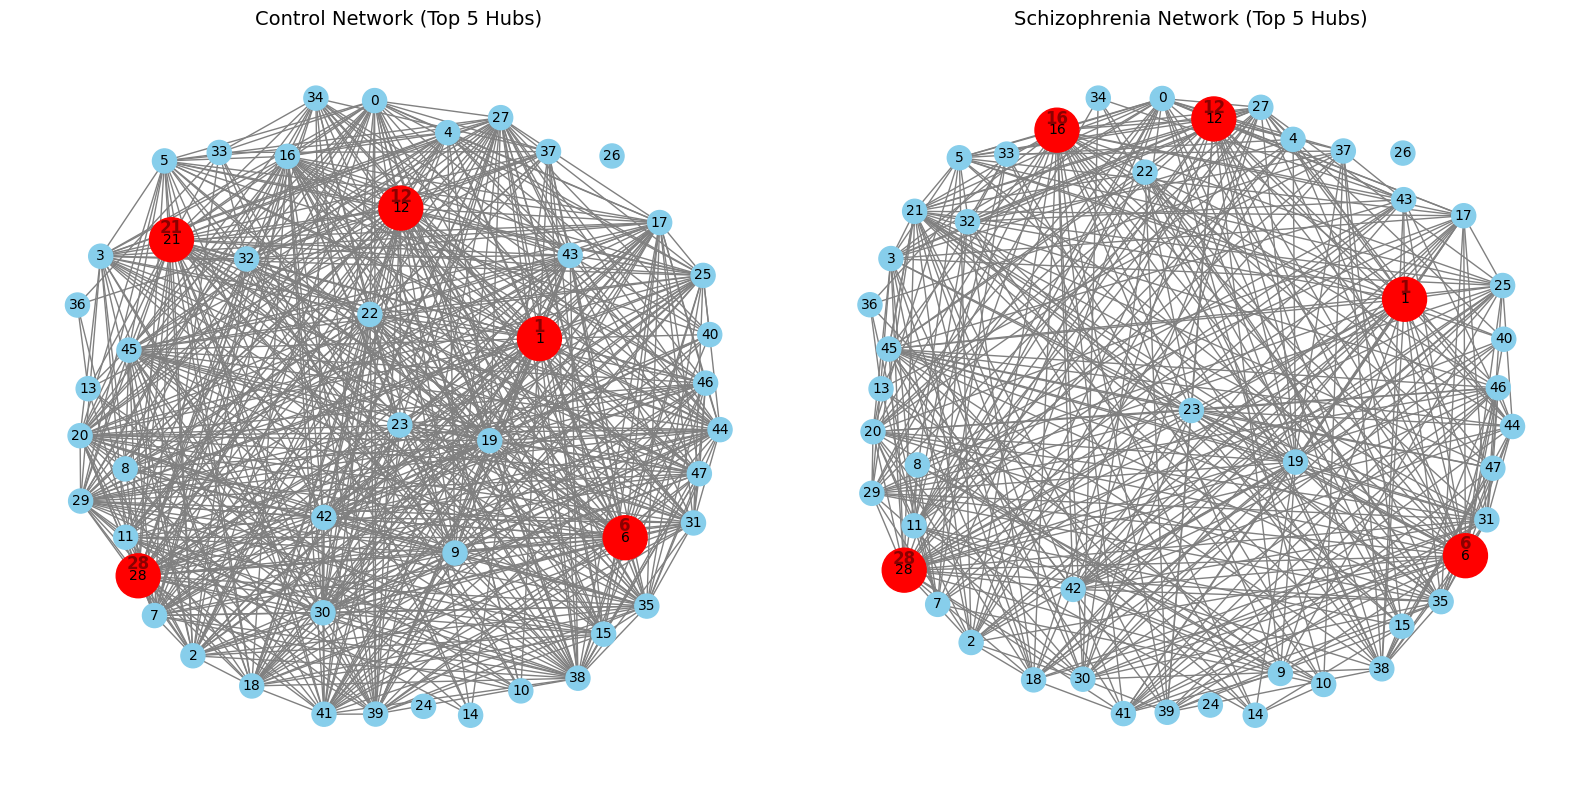

In [38]:
# Function to visualize two graphs side by side
def plot_graphs_side_by_side(G1, hubs1, title1, G2, hubs2, title2):
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))  # Two subplots side by side
    
    # Generate node positions (keep consistent for fair comparison)
    pos1 = nx.spring_layout(G1, seed=42, k=3.0)
    pos2 = nx.spring_layout(G2, seed=42, k=3.0)

    # Function to draw a single graph
    def draw_graph(ax, G, pos, hubs, title):
        node_colors = ["red" if node in hubs else "skyblue" for node in G.nodes()]
        node_size = [1000 if node in hubs else 300 for node in G.nodes()]

        nx.draw(G, pos, ax=ax, with_labels=True, node_size=node_size, node_color=node_colors, edge_color="gray", font_size=10)
        
        # Annotate hub nodes
        for node in hubs:
            ax.text(pos[node][0], pos[node][1] + 0.02, s=node, fontsize=12, fontweight='bold', color="darkred", ha="center")

        ax.set_title(title, fontsize=14)

    # Draw both networks
    draw_graph(axes[0], G1, pos1, hubs1, title1)
    draw_graph(axes[1], G2, pos2, hubs2, title2)

    plt.tight_layout()
    plt.show()

# Extract top 5 hubs from degree centrality (ensure lists are not empty)
top_5_control_hubs = [node for node, _ in control_sorted_degree[:5]] if len(control_sorted_degree) >= 5 else []
top_5_patient_hubs = [node for node, _ in patient_sorted_degree[:5]] if len(patient_sorted_degree) >= 5 else []

# Plot both networks side by side
plot_graphs_side_by_side(G_control, top_5_control_hubs, "Control Network (Top 5 Hubs)", 
                         G_patient, top_5_patient_hubs, "Schizophrenia Network (Top 5 Hubs)")

In [39]:
from networkx.algorithms.efficiency_measures import global_efficiency

efficiency_control = global_efficiency(G_control)
efficiency_patient = global_efficiency(G_patient)

print(f"Global Efficiency (Control): {efficiency_control}")
print(f"Global Efficiency (Patient): {efficiency_patient}")

if efficiency_patient < efficiency_control:
    print("Patients have reduced global efficiency → Slower brain communication.")
else:
    print("No significant difference in global efficiency.")



Global Efficiency (Control): 0.7307919621749398
Global Efficiency (Patient): 0.612662529550825
Patients have reduced global efficiency → Slower brain communication.
